In [19]:
import numpy as np
import pandas as pd
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [3]:
df.shape

(301, 9)

In [4]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Car_Name'].nunique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
98


In [5]:
# check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
#drop the car_name column
final_df = df.drop(['Car_Name'], axis=1)
final_df.shape

(301, 8)

In [7]:
#create new column Years_used which computes the 
# number of years the car has been used.
final_df['Years_used'] = 2022 - final_df['Year']
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_used
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [8]:
final_df.drop(['Year'], axis=1, inplace=True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_used
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [9]:
#encoding the categorical columns
final_df = pd.get_dummies(final_df, drop_first=True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#sns.pairplot(final_df);

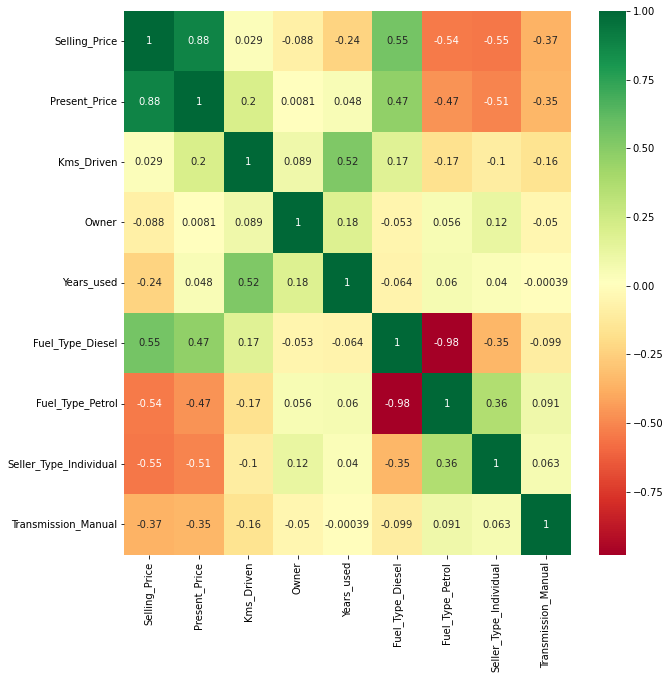

In [11]:
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

#plot heat map
g = sns.heatmap(final_df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [12]:
#extract the features and the target values from final_df
X = final_df.drop(['Selling_Price'], axis=1)
y = final_df['Selling_Price']

In [13]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [14]:
print(model.feature_importances_)

[0.37268385 0.03635842 0.00039649 0.08134699 0.22657413 0.01308388
 0.12274588 0.14681035]


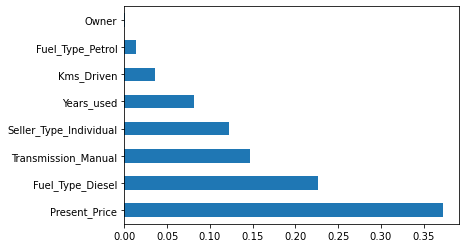

In [15]:
#visualizing feature importance
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(8).plot(kind='barh');

In [16]:
#convert the features and target variables into numpy arrays
X = final_df.drop(['Selling_Price'], axis=1).values
y = final_df['Selling_Price'].values

In [17]:
#divide the dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rfg = RandomForestRegressor()

#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(100, 1200, 12)]
#number of features to consider at every split
max_features = [1]
#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, 6)]
#minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

rscv = RandomizedSearchCV(estimator=rfg,
                          param_distributions=param_grid,
                          scoring='neg_mean_squared_error',
                          n_iter=10,
                          n_jobs=-1,
                          cv=10,
                          verbose=2,
                          refit=True,
                          random_state=1)
rscv.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': [1],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=1, scoring='neg_mean_squared_error', verbose=2)

In [31]:
y_pred = rscv.predict(X_test)

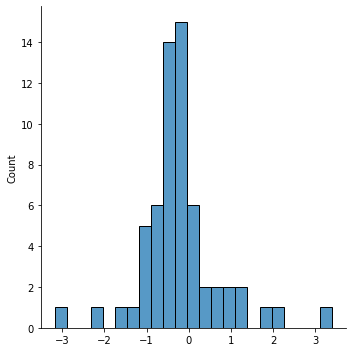

In [42]:
#plot the difference between the taget values 
# and the predicted values to know how well the 
# the model is doing on unseen data
sns.displot(y_test - y_pred);

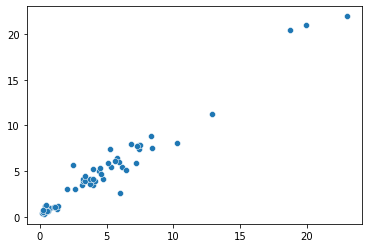

In [41]:
sns.scatterplot(x=y_test, y=y_pred);